# Exploratory Data Analysis v2

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math

In [2]:
"""
Read in the initial cohort
"""
initial_cohort = pd.read_csv("../data/initial_cohort_final_v02(updated).csv", index_col=0)
cohort_size = len(initial_cohort)
cohort_size

15929

In [3]:
"""
Look at only relevant features
"""
non_feature_cols = ["subject_id", "hadm_id", "stay_id", "n_stays"]
initial_cohort_features = initial_cohort.drop(columns=non_feature_cols)
initial_cohort_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15929 entries, 0 to 15928
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sum_los                15929 non-null  float64
 1   anchor_age             15929 non-null  int64  
 2   gender                 15929 non-null  object 
 3   suspected_infection    8361 non-null   float64
 4   admission_type         15929 non-null  object 
 5   weight                 14553 non-null  float64
 6   Height_chart           9676 non-null   float64
 7   heart_rate_min         15899 non-null  float64
 8   heart_rate_max         15899 non-null  float64
 9   temperature_min        14179 non-null  float64
 10  temperature_max        14179 non-null  float64
 11  ABPm_min               8138 non-null   float64
 12  ABPm_max               8138 non-null   float64
 13  ABPd_min               8079 non-null   float64
 14  ABPd_max               8079 non-null   float64
 15  AB

In [4]:
"""
Columns names and checking for NA values
"""
missing_threshold = 0.3
missing_values = pd.DataFrame(initial_cohort.isna().sum(), columns=["NA_count"])
missing_values.index.name = "feature"
missing_values["NA_proportion"] = missing_values["NA_count"] / cohort_size
missing_values = missing_values[missing_values["NA_proportion"] >= missing_threshold] \
    .sort_values(by=["NA_proportion"], ascending=False)
missing_values

,NA_count,NA_proportion
feature,,
epinephrine_rate,15929,1.000000
epinephrine_amount,15921,0.999498
dobutamine_rate,15694,0.985247
dobutamine_amount,15694,0.985247
dopamine_rate,15620,0.980601
dopamine_amount,15620,0.980601
milrinone_amount,15421,0.968108
milrinone_rate,15421,0.968108
vasopressin_rate,14974,0.940046


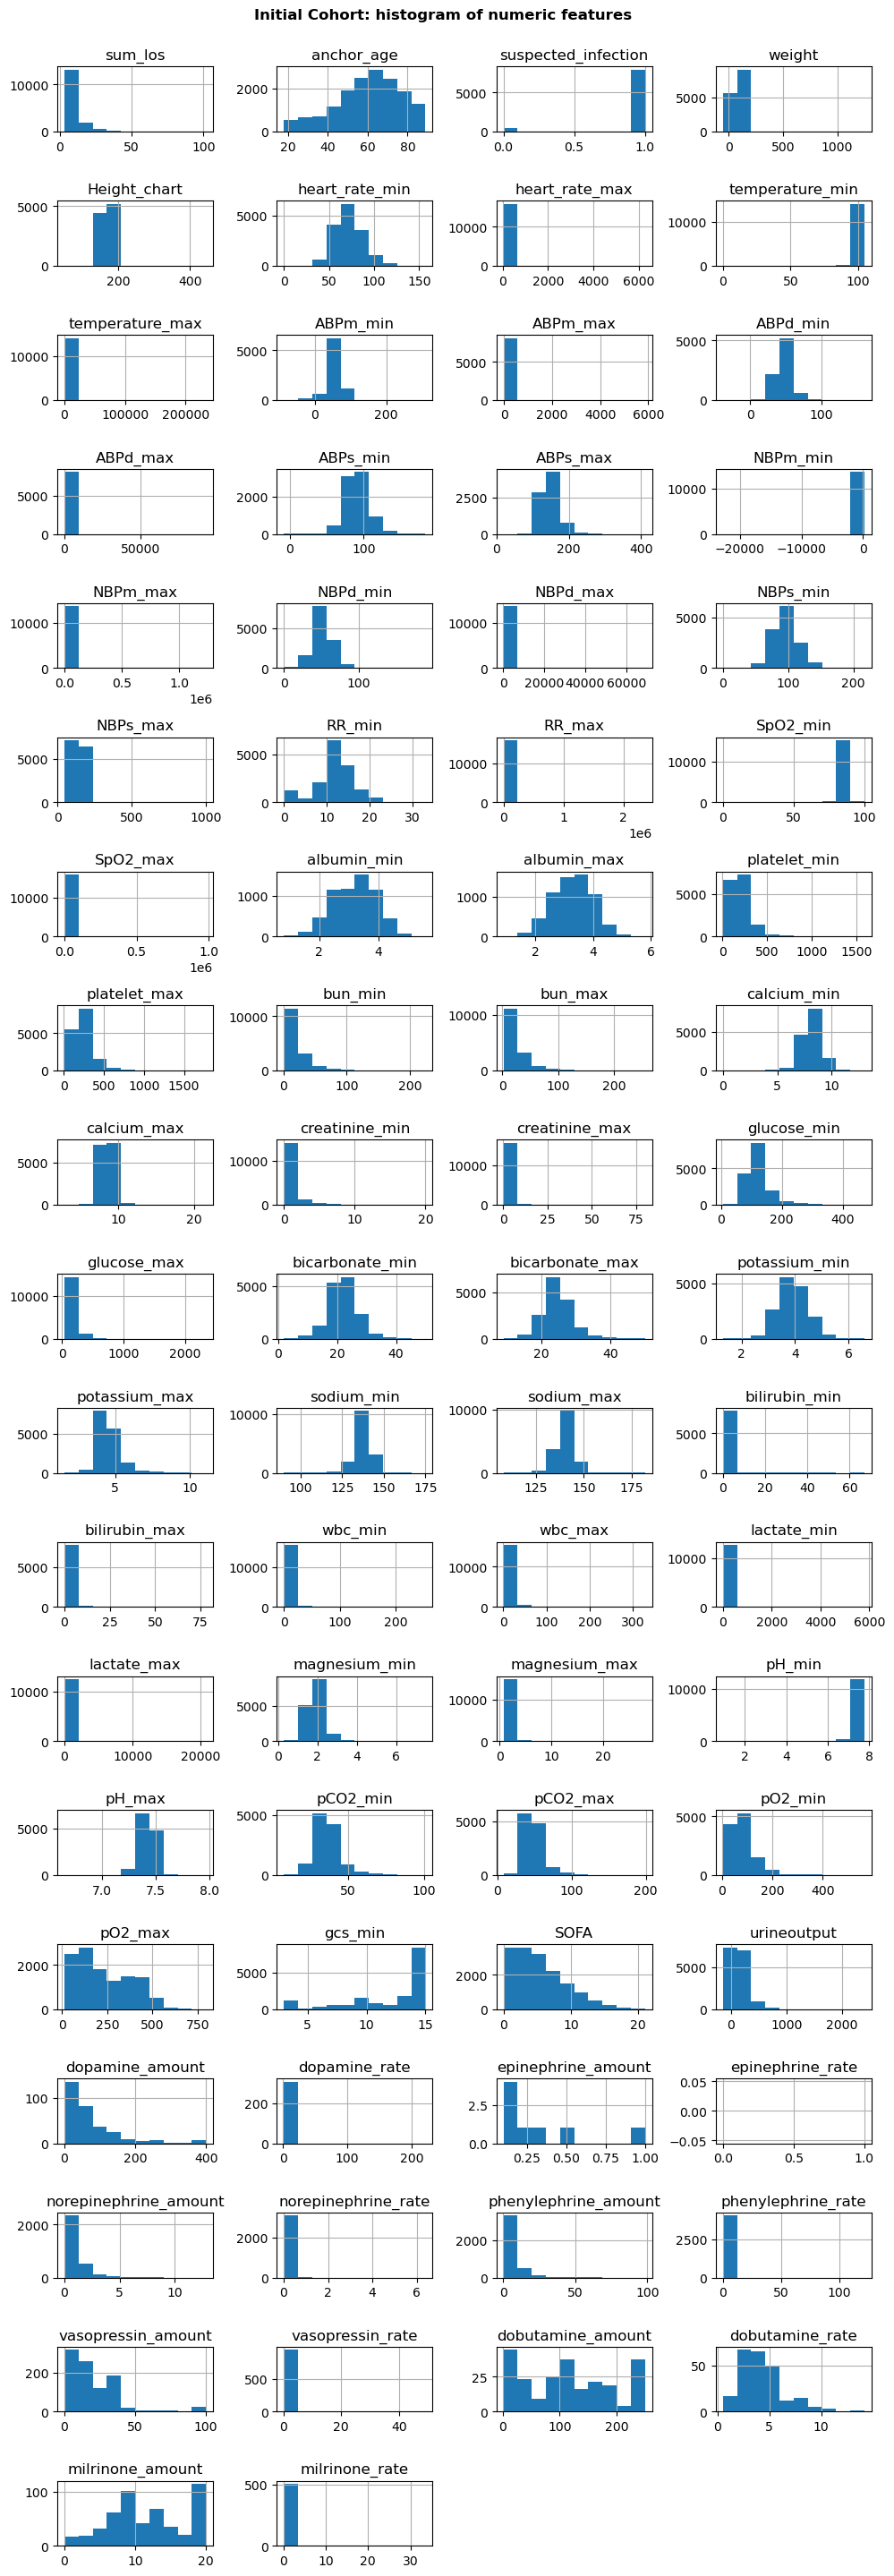

In [5]:
def plot_df_histogram(df, title:str, figsize:tuple=(10,4), across:int = 4, **kwargs):
    """
    Plots a histogram from the dataframe
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
        figsize (tuple): Size of the figure to pass to pyplot.figure
        across (int): How many subplot columns to display
    """
    _, col_count = df.shape
    df.hist(figsize=figsize, layout=(math.ceil(col_count/across), across), **kwargs)
    plt.suptitle(title, fontweight="semibold", y=1.0)
    plt.tight_layout()
    plt.show()

plot_df_histogram(
    initial_cohort.drop(columns=non_feature_cols),
    title="Initial Cohort: histogram of numeric features",
    figsize=(10, 30),
    across=4
)

Column gender is not numeric
Column admission_type is not numeric
Column ventilation_status is not numeric


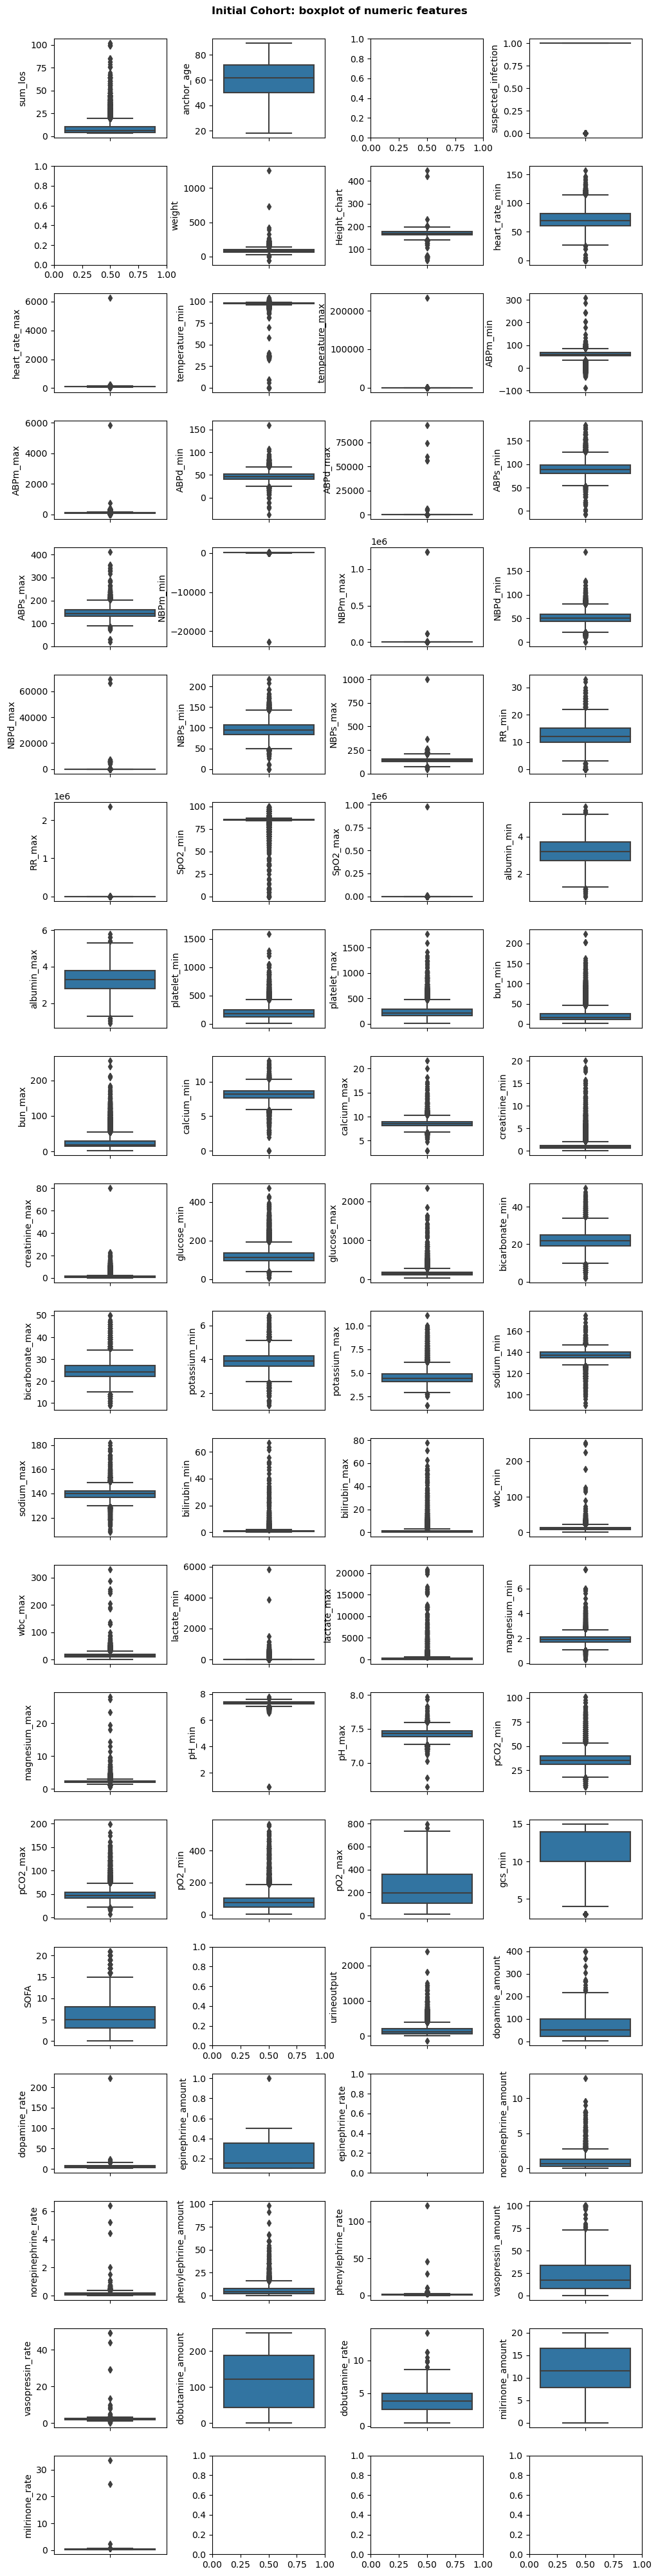

In [6]:
def plot_cohort_statistics(df, title:str, figsize=(10,10), across:int=4):
    """
    Use a boxplot to visualise the numerical features
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
        figsize (tuple): Size of the figure to pass to pyplot.figure
        across (int): How many subplot columns to display
    """
    _, col_count = df.shape
    col = across
    row = math.ceil(col_count/across)
    width, height = figsize
    fig, axs = plt.subplots(row, col)
    fig.set_size_inches(width, height)
    fig.suptitle(title, fontweight="semibold", y=1.0)
    fig.tight_layout()
    
    df_plt = df.copy()

    for i, column in enumerate(df_plt):
        r = math.floor(i / col)
        c = i % col
        try:
            sns.boxplot(y=df_plt[column], ax=axs[r][c])
        except:
            print(f"Column {column} is not numeric")
            continue
    
    plt.show()

plot_cohort_statistics(
    initial_cohort.drop(columns=non_feature_cols),
    title="Initial Cohort: boxplot of numeric features",
    figsize=(10, 40),
    across=4
)